## NAME:CHANDRU M
## DATASET:GOOGLE APP STORE .

## OBJECTIVE:MAKE A MODEL TO PREEDICT THE APP RATING.


## PROBLEM STATEMENT:
###### Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

## DATASET COLUMNS DESCRIPTION

#### 1.App: Application name
#### 2.Category: Category the app belongs to
#### 3.Rating: Overall user rating of the app (as when scraped)
#### 4.Reviews: Number of user reviews for the app (as when scraped)
#### 5.Size: Size of the app (as when scraped)
#### 6.Installs: Number of user downloads/installs for the app (as when scraped)
#### 7.Type: Paid or Free
#### 8.Price: Price of the app (as when scraped)
#### 9.Content: Rating Age group the app is targeted at - Children / Mature 21+ / Adult
#### 10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
#### 11.Last Updated: Date when the app was last updated on Play Store (as when scraped)
#### 12.Current Ver: Current version of the app available on Play Store (as when scraped)
#### 13.Android Ver: Min required Android version (as when scraped)


## STEPS TO PERFORM
## IMPORTING LIBRARIES AND DATASETS
##### LOAD THE DATA FILE USING PANDAS.


In [1]:
import pandas as pd                   # Importing pandas for data analytics with the alias name pd.
import numpy as np                    # Importing numpy for data analytics with the alias name np.
import matplotlib.pyplot as plt       # Importing matplotlib and Seaborn Library for visualization.
import seaborn as sns
import string                         #Importing string function to manipulate the string problems using string.punctuation. 
from sklearn import preprocessing
from termcolor import colored          

In [2]:
df=pd.read_csv('googleplaystore.csv') #Read the 'googleplaystore.csv' file using pandas alias name pd and store into the df(DataFrame)

In [3]:
df.head()                   #Check the Top 5 df rows using head function (The index value start from 0)

,App,Category,Rating,Reviews,Size,Installs#########,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
print(f'Shapes of the DataFrame(df):\nRows    :{df.shape[0]}\nColumns :{df.shape[1]}')           #Check the df shape 

Shapes of the DataFrame(df):
Rows    :10841
Columns :13


#####  Clean the data in terms of column names and imput ethe special chars with max occuring value of column.

In [5]:
print(colored('Check the columns name and index value', 'blue',attrs=['bold']))
string_punctuation=string.punctuation                     # string.punctuation contains list of all special characters values like this ['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']
string_punctuation_check=list(string_punctuation)         #  Clean the data in terms of column names
for j in range(len(string_punctuation_check)):    
    for i in range(len(df.columns)):
        if (string_punctuation_check[j] in df.columns[i]):
            print(f'Colunm name is : {df.columns[i]} and the index value is : {i}')

Check the columns name and index value
Colunm name is : Installs######### and the index value is : 5


In [6]:
df.columns #Checking if the column names are without special characters and empty string

Index(['App', 'Category', 'Rating', 'Reviews',
       '                                    Size', 'Installs#########', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.columns=df.columns.str.replace('['+string_punctuation+']','',regex=True)    #Replacing all the special characters to empty string
print(df.columns)
print()
df.columns=df.columns.str.strip()   #Replacing all empty space to empty string
print(df.columns)
df.head()


Index(['App', 'Category', 'Rating', 'Reviews',
       '                                    Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#####  Impute the special chars with max occuring value of column

In [8]:

val=colored(str(len(string_punctuation)),'blue',attrs=['bold'])
print(f'string_punctuation value:{string_punctuation} and length is {val} ')

dot_index=string_punctuation.index('.')
string_punctuation=string_punctuation[:dot_index]+string_punctuation[dot_index+1:]
val=colored(str(len(string_punctuation)),'blue',attrs=['bold'])
val1=colored(dot_index,'blue',attrs=['bold'])
print(f'dot index : {val1}\nThe length of string_punctuation,after removing dot value {val} ')

minus_index=string_punctuation.index('-')
string_punctuation=string_punctuation[:minus_index]+string_punctuation[minus_index+1:]
val1=colored(minus_index,'blue',attrs=['bold'])
val=colored(str(len(string_punctuation)),'blue',attrs=['bold'])
print(f'minus_index : {val1}\nThe length of string_punctuation,after removing minus value {val} ')
# print(list(string_punctuation))


string_punctuation value:!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ and length is 32 
dot index : 13
The length of string_punctuation,after removing dot value 31 
minus_index : 12
The length of string_punctuation,after removing minus value 30 


In [9]:
df=df.replace('['+string_punctuation+']','',regex=True) # replacing the special characters in the data to empty string
for i in df.columns:    
    df[i]=df[i].replace('',df[i].mode().iloc[0],regex=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ARTANDDESIGN,4.1,159,19M,10000,Free,0,Everyone,Art Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ARTANDDESIGN,3.9,967,14M,500000,Free,0,Everyone,Art DesignPretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ARTANDDESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw Paint,ARTANDDESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ARTANDDESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art DesignCreativity,20-Jun-18,1.1,4.4 and up


###### Check for null values in the data. Get the number of null values for each column.


In [10]:
df.isnull().sum() # Drop records with nulls in any of the columns.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [11]:
for i in df.columns:
    print(i)               #column name
    print(df[i].unique())  #unique values
    print()

App
['Photo Editor  Candy Camera  Grid  ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope  Astrology']

Category
['ARTANDDESIGN' 'AUTOANDVEHICLES' 'BEAUTY' 'BOOKSANDREFERENCE' 'BUSINESS'
 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT' 'EVENTS'
 'FINANCE' 'FOODANDDRINK' 'HEALTHANDFITNESS' 'HOUSEANDHOME'
 'LIBRARIESANDDEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVELANDLOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEOPLAYERS'
 'NEWSANDMAGAZINES' 'MAPSANDNAVIGATION' '1.9']

Rating
['4.1' '3.9' '4.7' '4.5' '4.3' '4.4' '3.8' '600000000' '4.6' '3.2' '4'
 '1.2' '4.8' '4.2' '4.9' '3.6' '3.7' '3.3' '3.4' '3.5' '3.1' '5' '2.6' '3'
 '1.9' '2.5' '2.8' '2.7' '1' '2.9' '2.3' '2.2' '1.7' '2' '1.8' '2.4' '1.6'
 '2.1' '1.4' '1.5' '19']

Reviews
['159' '967' '87510' ... '603' '1195' '

In [12]:
print("Before dropping nan values",df.shape)
df.dropna(axis=0,inplace=True)       # Dropping the records which has nan values in it
print("After dropping nan values",df.shape )

Before dropping nan values (10841, 13)
After dropping nan values (10829, 13)


###### Check for null values in the data. Get the number of null values for each column.

In [13]:
df.isnull().sum()                             #Check the null values after dropping the nan values records

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
df.dtypes                                      #Check the datatype of each columns using 'dtypes'

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

##### Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [15]:
newSize = []                                     # Create the  empty list name as 'newSize'
a,b,c,d=0,0,0,0                                  # Check the 'M' , "K'  and 'Varies with device' value count using a,b,c,d and assign 0
for row in df.Size:
    newrow = row[:-1]                         # Get the last value of each row and store into 'last_val' variables. 
    last_val=row[-1]
    if((newrow+'e')=='Varies with device'):  # if the last val is equal to  'Varies with device' then replace nan value using'np.nan' then append the newsize list.                                             
        a+=1
        newrow=np.nan
        newSize.append(newrow)
    elif last_val=='M':               #else if the last value is equal to 'M' then 'newrow'(contains numberic values) is Multiply the value by 1,000,then finally append the newsize list.
                                                            
        b+=1
        newrow=float(newrow)*1000
        newSize.append(float(newrow))
    elif(last_val=='k'):               # suppose the last val is equal to 'K' then append the newSize list.
        c+=1
        newSize.append(float(newrow))
    else:
        newSize.append(0)
        
print(f'Length of the Totel DataFrame row Size: {len(df.Size)}\nM value counts: {b}\nK value counts: {c}\nVaries with device counts: {a}\nSum of (M),(k),and,(Varies with device) counts:  {a+b+c+d}')
df.Size = newSize        # Assign the dfSize values to newSize list values

df['Size'].fillna(int(df['Size'].mode()),inplace=True)    #Now df.Size having nan values,using fillna function replace the nan value to mod value     
        
    

Length of the Totel DataFrame row Size: 10829
M value counts: 8823
K value counts: 312
Varies with device counts: 1694
Sum of (M),(k),and,(Varies with device) counts:  10829


###### Extract the numeric value from the column

In [16]:
df.dtypes                 #Check the dtype of Size Columns

App                object
Category           object
Rating             object
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
print(df.columns)
obj_float=list(df.iloc[:,[2,3,5,7]].columns)
print(obj_float)#Extract the numeric value from the column
for i in range(len(obj_float)):
    df[obj_float[i]]=(df[obj_float[i]].astype(float))

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
['Rating', 'Reviews', 'Installs', 'Price']


In [18]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ARTANDDESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ARTANDDESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art DesignPretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ARTANDDESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw Paint,ARTANDDESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ARTANDDESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art DesignCreativity,20-Jun-18,1.1,4.4 and up


In [20]:
for i in df.columns:
    print(i)               #column name
    print(df[i].unique())  #unique values
    print()

App
['Photo Editor  Candy Camera  Grid  ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope  Astrology']

Category
['ARTANDDESIGN' 'AUTOANDVEHICLES' 'BEAUTY' 'BOOKSANDREFERENCE' 'BUSINESS'
 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT' 'EVENTS'
 'FINANCE' 'FOODANDDRINK' 'HEALTHANDFITNESS' 'HOUSEANDHOME'
 'LIBRARIESANDDEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVELANDLOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEOPLAYERS'
 'NEWSANDMAGAZINES' 'MAPSANDNAVIGATION']

Rating
[4.1e+00 3.9e+00 4.7e+00 4.5e+00 4.3e+00 4.4e+00 3.8e+00 6.0e+08 4.6e+00
 4.0e+00 1.2e+00 4.8e+00 4.2e+00 4.9e+00 3.6e+00 3.7e+00 3.2e+00 3.3e+00
 3.4e+00 3.5e+00 3.1e+00 5.0e+00 2.6e+00 3.0e+00 1.9e+00 2.5e+00 2.8e+00
 2.7e+00 1.0e+00 2.9e+00 2.3e+00 2.2e+00 1.7e+00 2.0e+00 1.8e+00 2.4e+00
 1.6e+00

## SANITY CHECKS:

###### Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [21]:
df=df[(df['Rating']>=1) & (df['Rating']<=5)]  

In [22]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.6, 4. , 1.2, 4.8, 4.2, 4.9,
       3.6, 3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5])

In [23]:
df.shape

(10828, 13)

###### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [24]:
df=df[df.Reviews<df.Installs]           

###### "For free apps (type = “Free”), the price should not be >0. Drop any such rows.

Free    10012
Paid      780
Name: Type, dtype: int64


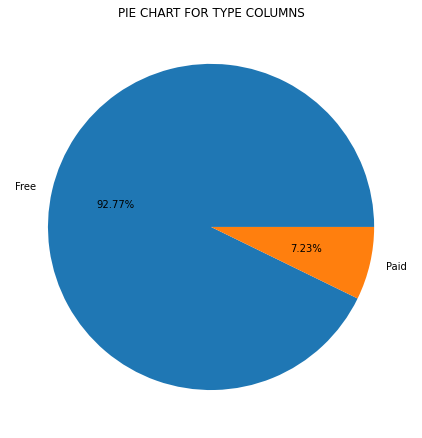

In [25]:
## PLOT THE PIE CHART USING 'TYPE' COLUMNS,WHICH ONE IS MOST DEMENDED.
plt.figure(figsize=(10,7.5))
plt.title("PIE CHART FOR TYPE COLUMNS")
size = df["Type"].value_counts()
print(size)
labels = df["Type"].unique()
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.show()

In [26]:
print("Based on the above pie chart Free apps are most buying apps compare then paid apps")

Based on the above pie chart Free apps are most buying apps compare then paid apps


In [27]:

df=df[(((df["Type"]=='Free')& (df['Price']<=0.0))|(df["Type"]=='Paid'))]    
print(df.shape)

(10792, 13)



##  VISUALIZATION

#### BOXPLOT FOR PRICE

[Text(0.5, 1.0, 'Boxplot for Price'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Values')]

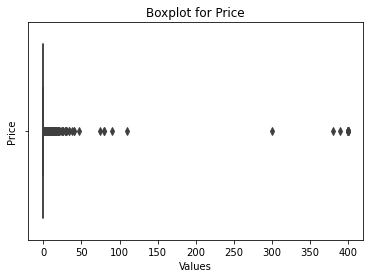

In [28]:

sns.boxplot(x=df['Price'],data=df).set(title="Boxplot for Price",ylabel='Price',xlabel='Values')

#### BOXPLOT FOR REVIEWS


[Text(0.5, 1.0, 'Boxplot for Reviews'),
 Text(0.5, 0, 'values'),
 Text(0, 0.5, 'Reviews')]

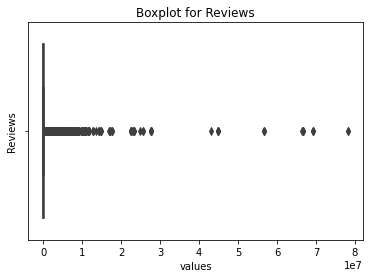

In [29]:
sns.boxplot(x=df.Reviews).set(title='Boxplot for Reviews',xlabel='values',ylabel='Reviews')

#### BOXPLOT FOR RATING

[Text(0.5, 1.0, 'Box plot for Rating'),
 Text(0.5, 0, 'values'),
 Text(0, 0.5, 'Rating')]

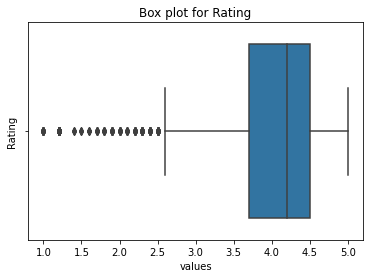

In [30]:
sns.boxplot(x=df.Rating).set(title="Box plot for Rating",xlabel='values',ylabel='Rating')

#### HISTROGRAM FOR RATING

[Text(0.5, 1.0, 'Histogram_Plot for Rating')]

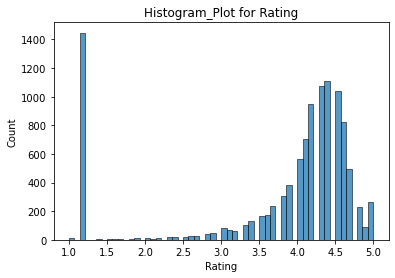

In [31]:
sns.histplot(x=df.Rating).set(title='Histogram_Plot for Rating')

#### HISTOGRAM FOR SIZE

[Text(0.5, 1.0, 'Histogram for Size')]

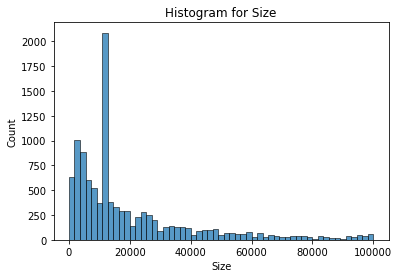

In [32]:
sns.histplot(x=df.Size).set(title='Histogram for Size')

#### BOXPLOT FOR SIZE

[Text(0.5, 1.0, ' BOXPLOT FOR SIZE'),
 Text(0, 0.5, 'Size'),
 Text(0.5, 0, 'count')]

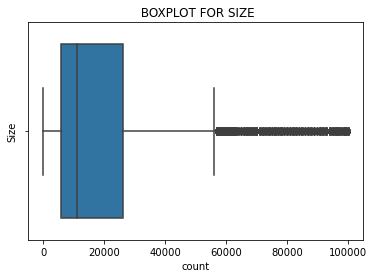

In [33]:
sns.boxplot(x=df.Size).set(title=" BOXPLOT FOR SIZE",ylabel="Size",xlabel="count")

## REMOVING OUTLIER USING THREE STD DEVIATION METHOD.

In [34]:


print(f"Before removing outlier values {df.shape}")
for i in df.columns:
    if df[i].dtype!='O':
        mean_val=df[i].mean()
        three_sd=df[i].std()*3 
        upper_limit=mean_val+three_sd
        lower_limit=mean_val-three_sd
        outlier=df[(df[i]>upper_limit )|(df[i]<lower_limit)]
        print(colored(i,'green',attrs=['bold']))
        print(outlier.index)

        df=df[(df[i]<=upper_limit ) & (df[i]>=lower_limit)]

print(f"After removing outlier values {df.shape}")

Before removing outlier values (10792, 13)
Rating
Int64Index([], dtype='int64')
Reviews
Int64Index([ 335,  336,  338,  342,  378,  381,  382,  385,  391,  403,
            ...
            4234, 4568, 4676, 4688, 5395, 6449, 7536, 7937, 8894, 8896],
           dtype='int64', length=103)
Size
Int64Index([  728,   748,  1055,  1080,  1312,  1345,  1384,  1522,  1531,
             1565,
            ...
            10060, 10100, 10192, 10271, 10345, 10394, 10396, 10507, 10588,
            10784],
           dtype='int64', length=278)
Installs
Int64Index([ 152,  340,  341,  347,  371,  383,  386,  451,  464,  465,  865,
            1661, 1729, 1759, 1886, 1920, 2546, 2554, 3117, 3127, 3223, 3232,
            3234, 3235, 3255, 3265, 3326, 3450, 3454, 3473, 3476, 3522, 3523,
            3533, 3562, 3565, 3569, 3574, 3687, 3703, 3711, 3736, 3755, 3765,
            3767, 3816, 3819, 3907, 3934, 4039, 4041, 4048, 4096, 4098, 4105,
            4144, 4147, 4150, 4153, 4170, 4222, 4365, 4566, 5596, 

[Text(0.5, 1.0, 'HEAT MAP')]

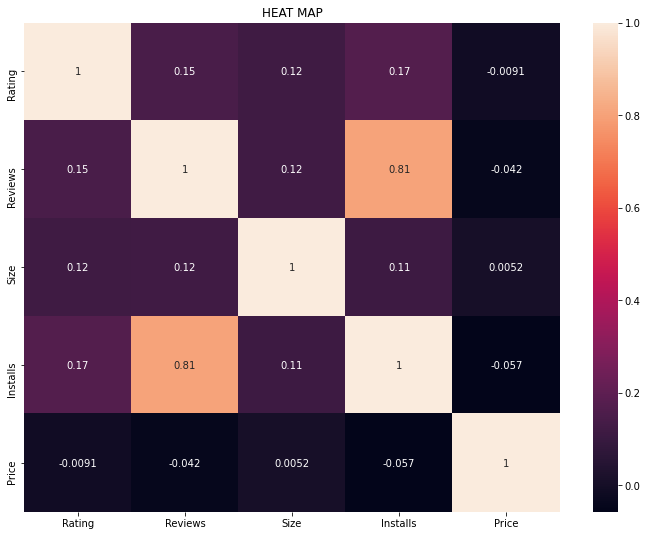

In [35]:
plt.figure(figsize=(12,9.0))
Corr_mat=df.corr()
sns.heatmap(data=Corr_mat,annot=True).set(title="HEAT MAP")  #Check the correlation matrix

## PRICE 
##### Price: From the box plot, it seems like there are some apps with very high price. A price of 200 for an application on the Play Store is very high and suspicious!
##### Check out the records with very high price

In [36]:
df.Price.unique()               #Check the unique value of price columns

array([ 0.  ,  4.99,  3.99,  6.99,  1.49,  2.99,  7.99,  5.99,  3.49,
        1.99,  9.99,  7.49,  0.99,  9.  ,  5.49, 10.  , 24.99, 11.99,
       16.99, 14.99,  1.  , 29.99, 12.99,  2.49, 10.99,  1.5 , 19.99,
       33.99, 39.99,  3.95,  4.49,  1.7 ,  8.99,  2.  ,  3.88, 25.99,
       17.99,  3.02,  1.76,  4.84,  1.61,  2.5 ,  1.59,  6.49,  1.29,
        5.  , 37.99, 18.99, 19.9 ,  8.49,  1.75, 14.  ,  4.85,  3.08,
        2.59,  4.8 ,  1.96, 19.4 ,  3.9 ,  4.59, 15.46,  3.04, 13.99,
        4.29,  2.6 ,  3.28,  4.6 , 28.99,  2.95,  2.9 ,  1.97,  2.56,
        3.61,  1.26,  1.2 ,  1.04])

In [37]:
print(f'Before dropping length {len(df.Price)}' )        #Check the length of the  price  values ,before dropping it.

Before dropping length 10324


In [38]:
df=df[(df.Price)<200]

In [39]:
print(f'After dropping length is:  {len(df.Price)}' ) 

After dropping length is:  10324


## REVIEWS
### Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [40]:
Review_list=[]                           # Check manually how many rows are dropped
drop_list=[]
for i in df.Reviews:
    if(i>2000000):
        drop_list.append(i)
    else:
        Review_list.append(i)
print(f'Total Reviews length values is  :{len(df.Reviews)}' )
print(f'The review value greater then 2 million count is (dropping length) :{len(drop_list)}')
print(f'The review value  Less then 2 million count is  :{len(Review_list)}')
print(f'Sum of the both values  :{len(drop_list+Review_list)}')

Total Reviews length values is  :10324
The review value greater then 2 million count is (dropping length) :280
The review value  Less then 2 million count is  :10044
Sum of the both values  :10324


In [41]:
df=df[(df.Reviews<2000000)]                   # drop the values greater then 2 millions.

In [42]:
print(f'The review value Less then 2 million counts is  :{len(Review_list)}')
print(f'The length of the Reviews values counts after dropping :{len(df.Reviews)}' )
print(f"Both the df length is {'Equals' if len(Review_list)==len(df.Reviews) else 'Not Equals'}")#  the length of Reviews after dropping.

The review value Less then 2 million counts is  :10044
The length of the Reviews values counts after dropping :10044
Both the df length is Equals


## INSTALLS
###  Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

#### Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [43]:
different_percentiles=[0.1,0.25,0.50,0.70,0.90,0.95,0.99]
l1=[]
for i in different_percentiles:
    l1.append(str(int(i*100))+' % of Installs values is : '+str(df['Installs'].quantile(i)))
for i in l1:
    print(i)

10 % of Installs values is : 100.0
25 % of Installs values is : 1000.0
50 % of Installs values is : 100000.0
70 % of Installs values is : 1000000.0
90 % of Installs values is : 10000000.0
95 % of Installs values is : 10000000.0
99 % of Installs values is : 100000000.0


In [44]:
df=df[(df['Installs']<df['Installs'].max())]       # Apps having very high number of installs should be dropped from the analysis.

In [45]:
df.shape

(9922, 13)

In [46]:
df["Price"].unique()

array([ 0.  ,  4.99,  3.99,  6.99,  1.49,  2.99,  7.99,  5.99,  3.49,
        1.99,  9.99,  7.49,  0.99,  9.  ,  5.49, 10.  , 24.99, 11.99,
       16.99, 14.99,  1.  , 29.99, 12.99,  2.49, 10.99,  1.5 , 19.99,
       33.99, 39.99,  3.95,  4.49,  1.7 ,  8.99,  2.  ,  3.88, 25.99,
       17.99,  3.02,  1.76,  4.84,  1.61,  2.5 ,  1.59,  6.49,  1.29,
        5.  , 37.99, 18.99, 19.9 ,  8.49,  1.75, 14.  ,  4.85,  3.08,
        2.59,  4.8 ,  1.96, 19.4 ,  3.9 ,  4.59, 15.46,  3.04, 13.99,
        4.29,  2.6 ,  3.28,  4.6 , 28.99,  2.95,  2.9 ,  1.97,  2.56,
        3.61,  1.26,  1.2 ,  1.04])

## CATEGORIES

[Text(0.5, 1.0, 'The most dominant category')]

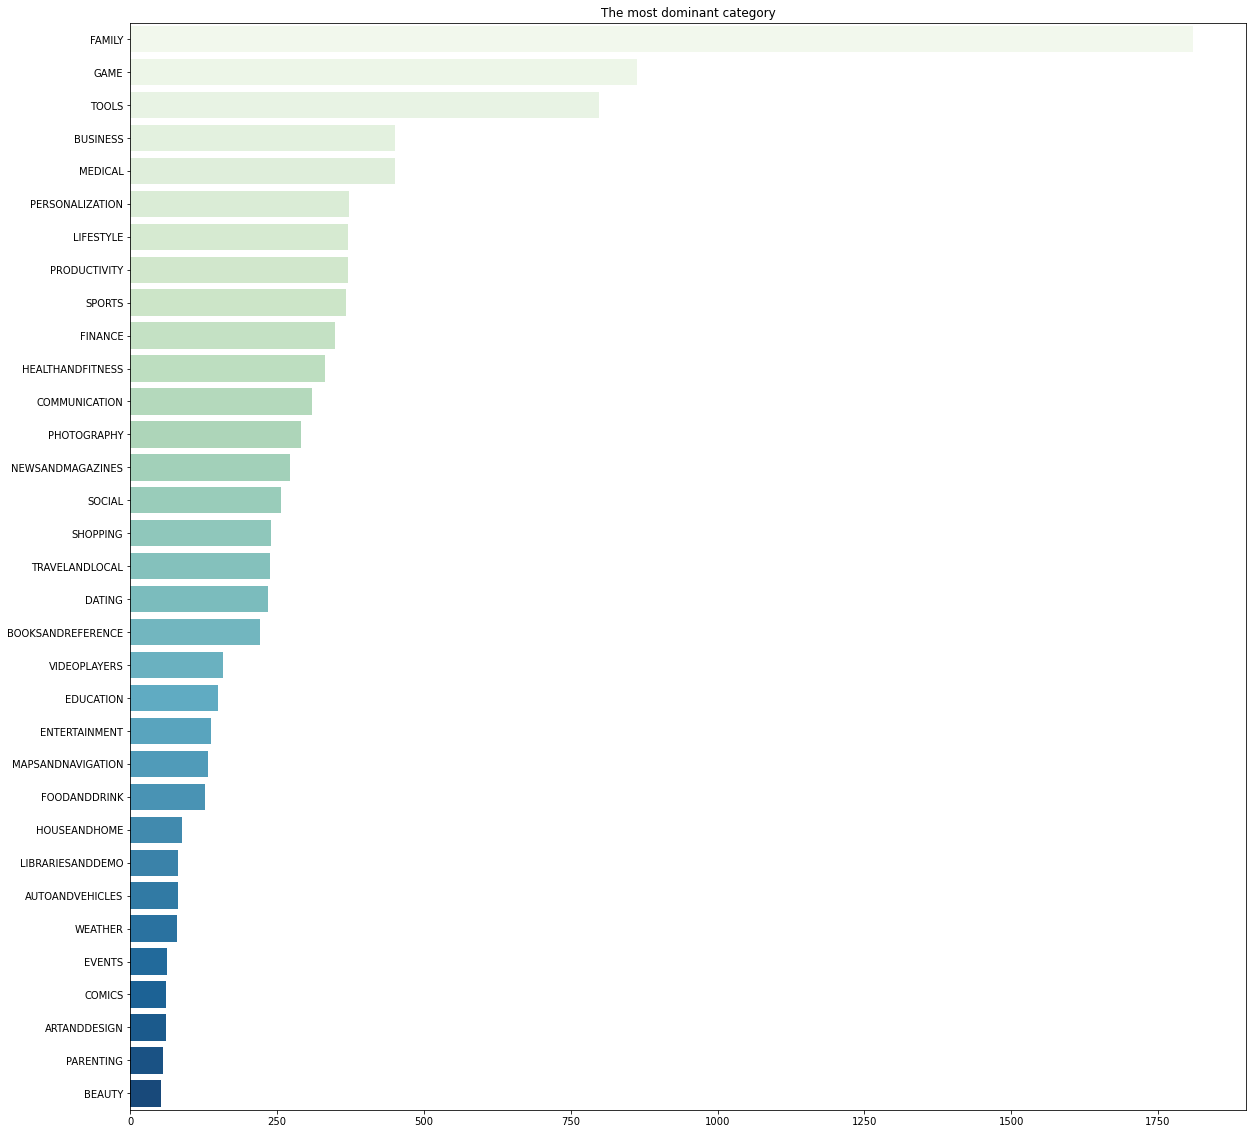

In [47]:
plt.figure(figsize=(20,20))
categories = df["Category"].value_counts()
sns.barplot(x=categories.values, y=categories.index, palette="GnBu").set(title="The most dominant category")


In [48]:
print("FAMILY CATEGORIES APPS ARE MOST POPULAR ONE.")

FAMILY CATEGORIES APPS ARE MOST POPULAR ONE.


## FIND CORRELATION IN VARIABLES AND REMOVE ALL BUT ONE WHICH ARE HIGHLY CORRELATED.


In [49]:
corr=df.drop(["Rating"],axis=1).corr()  #Finding correlation between columns except target variable
corr

,Reviews,Size,Installs,Price
Reviews,1.000000,0.139649,0.755281,-0.058524
Size,0.139649,1.000000,0.095918,0.008812
Installs,0.755281,0.095918,1.000000,-0.064055
Price,-0.058524,0.008812,-0.064055,1.000000


[Text(0.5, 1.0, 'HEAT MAP')]

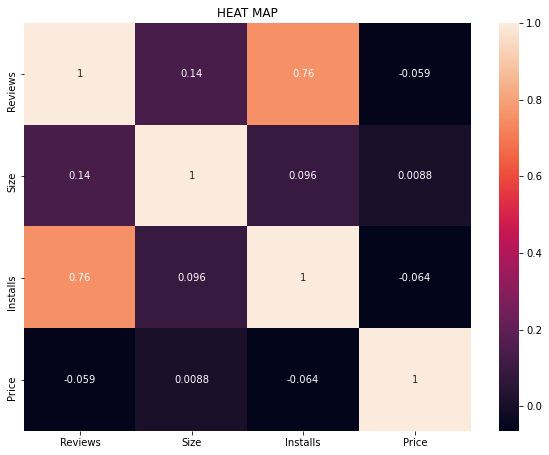

In [50]:
plt.figure(figsize=(10,7.5))
sns.heatmap(corr,annot=True).set(title="HEAT MAP")

In [51]:
upper_triangle=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))#Taking upper triangle value .
upper_triangle

,Reviews,Size,Installs,Price
Reviews,NaN,0.139649,0.755281,-0.058524
Size,NaN,NaN,0.095918,0.008812
Installs,NaN,NaN,NaN,-0.064055
Price,NaN,NaN,NaN,NaN


In [52]:
drop_list=[i for i in upper_triangle.columns if any(upper_triangle[i]>0.80)] #check the column ,which is highly correlated
if len(drop_list)>0:
    print(drop_list)
else:
    print("No Columns are Highly correlated")
df.head()

No Columns are Highly correlated


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ARTANDDESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ARTANDDESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art DesignPretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ARTANDDESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw Paint,ARTANDDESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ARTANDDESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art DesignCreativity,20-Jun-18,1.1,4.4 and up


#### Make scatter plot/joinplot for Rating vs. Price

[Text(0.5, 1.0, ' Rating vs. Price')]

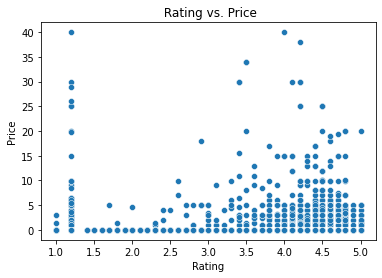

In [53]:
sns.scatterplot(data=df, x="Rating", y="Price").set(title=" Rating vs. Price")

#### Make scatter plot/joinplot for Rating vs. Size

[Text(0.5, 1.0, ' Rating vs. Size')]

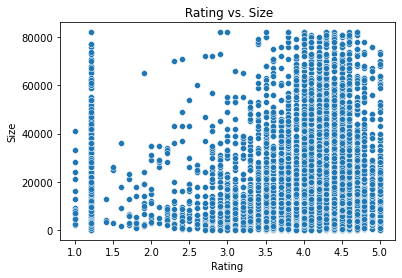

In [54]:
sns.scatterplot(data=df, x="Rating", y="Size").set(title=" Rating vs. Size")

#### Make scatter plot/joinplot for Rating vs. Reviews

[Text(0.5, 1.0, 'Rating vs. Reviews')]

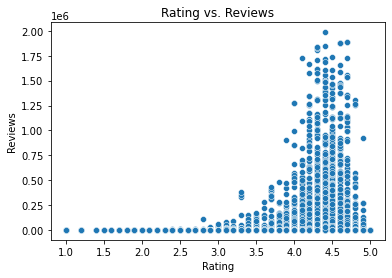

In [55]:
sns.scatterplot(data=df, x="Rating", y="Reviews").set(title="Rating vs. Reviews")

#### Make boxplot for Rating vs. Content Rating

[Text(0.5, 1.0, 'Make boxplot for Rating vs. Content Rating')]

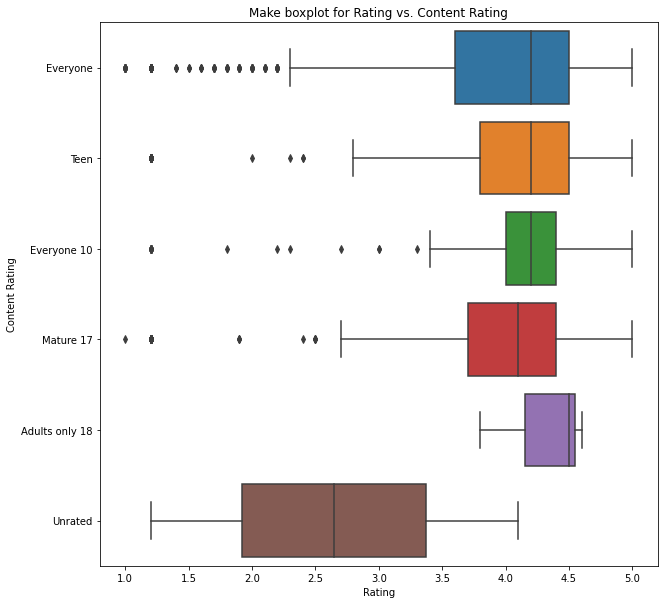

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Rating", y="Content Rating").set(title="Make boxplot for Rating vs. Content Rating")

#### Make boxplot for Ratings vs. Category

[Text(0.5, 1.0, 'Make boxplot for Ratings vs. Category')]

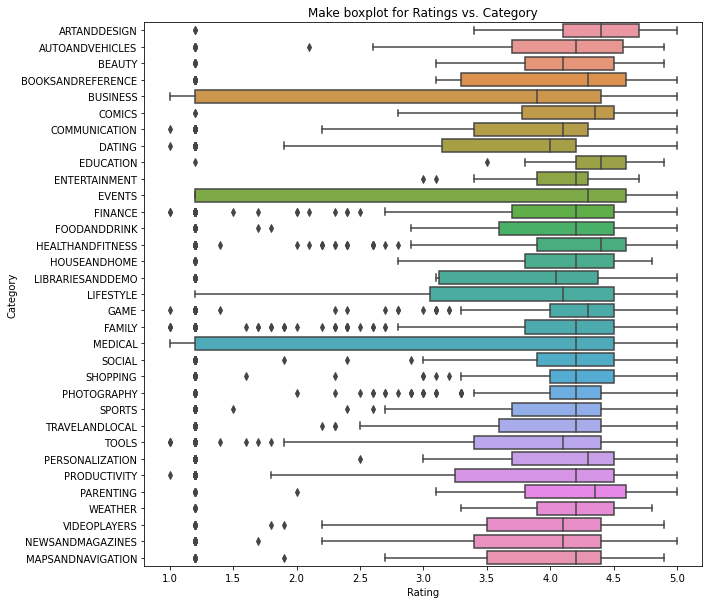

In [57]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Rating", y="Category").set(title="Make boxplot for Ratings vs. Category")

###### Create a copy of the dataframe to make all the edits. Name it inp1

In [58]:
inp1=df.copy()     #Create a copy of the dataframe to make all the edits. Name it inp1
inp1.head() 
log_df=inp1.copy()         #copy of  Logistic regression 
dis_df=inp1.copy()         #copy of disiciontree 

In [59]:
df.shape

(9922, 13)

In [60]:
inp1.shape

(9922, 13)

###### Reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [61]:
inp1[['Reviews','Installs']]=np.log1p(inp1[['Reviews','Installs']])  # using np.log1 method to perform log transformation.
inp1.tail()    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,1.2,1.386294,9500.0,6.908755,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKSANDREFERENCE,4.5,4.744932,11000.0,6.908755,Free,0.0,Mature 17,Books Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope Astrology,LIFESTYLE,4.5,12.894981,19000.0,16.118096,Free,0.0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


###### Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [62]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True) #drop the unused columns and store the remaining values in inp1 DataFrame

In [63]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ARTANDDESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art Design
1,ARTANDDESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art DesignPretend Play
2,ARTANDDESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art Design
3,ARTANDDESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art Design
4,ARTANDDESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art DesignCreativity


In [64]:
inp1.columns #check the columns names after dropping

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

###### Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [65]:
df_test=inp1['Rating']


In [66]:
inp2 = pd.get_dummies(inp1,columns=["Category",'Content Rating','Genres','Type'],drop_first=False)
inp2.head()
df_train=inp2.drop(["Rating"],axis=1) # Create the df_train variable and store all independent variables .
df_train.dtypes                       # Check the dtypes of df_train,because the string  format is not supported the model all must have numeric type.


Reviews                                      float64
Size                                         float64
Installs                                     float64
Price                                        float64
Category_ARTANDDESIGN                          uint8
                                              ...   
Genres_Video Players  EditorsMusic  Video      uint8
Genres_Weather                                 uint8
Genres_Word                                    uint8
Type_Free                                      uint8
Type_Paid                                      uint8
Length: 159, dtype: object

## LINEAR REGRESSION
##### TRAIN  TEST  SPLIT  AND  APPLY  70-30  SPLIT .NAME THE  NEW DATAFRAMES  df_train  AND  df_test.  SEPARATE  THE   DATAFRAMES   INTO x_train,y_train,x_test and y_test.


In [67]:
#linear regression
from sklearn.linear_model import LinearRegression  #Using.linear_model sklearn import LinearRegression.
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score


In [68]:
# TRAIN  TEST  SPLIT  AND  APPLY  70-30  SPLIT .NAME THE  NEW DATAFRAMES  df_train  AND  df_test.  SEPARATE  THE   DATAFRAMES   INTO x_train,y_train,x_test and y_test.
X_train, X_test, Y_train, Y_test  = train_test_split(df_train,df_test,test_size=0.3,random_state=5)
print("shape of x_train ", X_train.shape)
print("shape of y_train ", Y_train.shape)
print("shape of x_test ", X_test.shape)
print("shape of y_test ", Y_test.shape)

shape of x_train  (6945, 159)
shape of y_train  (6945,)
shape of x_test  (2977, 159)
shape of y_test  (2977,)


In [69]:
lin_model= LinearRegression()           #Store the LinearRegression model in 'model' variable.
lin_model.fit(X_train, Y_train)          #fit the model xtrain and ytrain in fit function.fit function contains y=mx+c (linear Regression)

LinearRegression()

## REPORT THE R2 SCORE  AND RMSE ON THE TRAINING SET

In [70]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print('R2 score is {}'.format(r2))
r2=(round(r2,2)*100)
print(f'Accuracy is :{r2}%')
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.9055884784133156
R2 score is 0.3883053408518268
Accuracy is :39.0%




## REPORT THE R2 SCORE  AND RMSE ON THE TESTING SET

In [71]:
# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
r2=(round(r2,2)*100)
print(f'Accuracy is :{r2}%')
linear_r2val=r2


The model performance for testing set
--------------------------------------
RMSE is 0.9215214685971475
R2 score is 0.35315950292102016
Accuracy is :35.0%


## SLOPES AND INTERCEPT

In [72]:
print("slopes are ", lin_model.coef_)
print("intercept is ", colored(lin_model.intercept_,'blue',attrs=['bold']))


slopes are  [ 1.61213803e-01 -1.62447585e-06  2.27413627e-02 -1.04571729e-02
  4.70702683e-01  1.10282632e-01  8.19401208e-02  5.59212839e-02
 -7.07385058e-02  4.75121841e-01 -7.77335446e-02 -3.94440972e-02
 -2.49252283e-01 -2.59302356e-01  2.00881607e-01  7.94074262e-02
  7.74518235e-02 -3.47016828e-02 -8.53133706e-02  9.76838683e-03
 -5.93479236e-02  2.43636609e-02  4.47054203e-02  5.30083631e-02
  1.19500580e-01 -2.57467631e-03 -1.00914330e-01  4.46031137e-02
 -5.27384324e-02 -1.71425335e-02 -1.87146986e-02 -1.26989202e-02
 -5.84819325e-01 -9.01444899e-02  1.25218128e-01 -1.91611344e-01
 -2.56845555e-02 -6.13974827e-02 -3.27435953e-02 -8.54824719e-02
 -2.83892231e-02 -1.50001803e-01  3.58014576e-01  1.60128919e-01
 -1.86208050e-01  2.61763498e-01 -1.77270495e-01  6.77132680e-02
  4.29248041e-02 -2.85987730e-01  2.01866574e-01 -2.15510522e+00
 -5.41364128e-02  8.55517390e-02  1.10282632e-01  8.19401208e-02
  3.27905766e-01 -1.21359610e-01  4.38277472e-01 -6.24500451e-13
  5.59212839e

# LOGISTIC REGRESSION

In [73]:
 # Taking copy of (original Analysis data) inp1 data to log_df.
log_df.head()               

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ARTANDDESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ARTANDDESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art DesignPretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ARTANDDESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw Paint,ARTANDDESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ARTANDDESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art DesignCreativity,20-Jun-18,1.1,4.4 and up


### CONVERTING CONTINUOUS DATA TO CATEGORICAL DATA BECAUSE CONTINUOUS DATA IS NOT SUPPORTED IN LOGISTIC REGRESSION.




In [74]:
# USING LABLEENCODER CONVERTING ALL CONTINUOUS DATA TO CATEGORICAL DATA          
from sklearn.preprocessing import LabelEncoder          
label=LabelEncoder()
for i in log_df:
    log_df[i]=label.fit_transform(log_df[i])


In [75]:
# CHECKING THE CATEGORICAL DATA 
log_df.head()                                        

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6574,0,29,158,370,8,0,0,1,7,291,106,15
1,2509,0,27,722,365,11,0,0,1,10,657,913,15
2,8148,0,35,3839,348,13,0,0,1,7,6,425,15
3,7384,0,33,4422,376,15,0,0,4,7,341,2524,17
4,6627,0,31,722,289,10,0,0,1,9,894,256,19


In [76]:
 # CONSIDERING 'Y'  IS DEPENDENT VARIABLES ,DEPENDENT VARIABLES 
y=log_df['Rating']
#CONSIDERING 'X' IS THE INDEPENDENT VARIABLES
x=log_df.drop(['Rating','App','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1)
print(f"DEPENDENT VARIABLES :\n{y}\nINDEPENDENT VARIABLES:\n{x}")


DEPENDENT VARIABLES :
0        29
1        27
2        35
3        33
4        31
         ..
10836    33
10837    38
10838     1
10839    33
10840    33
Name: Rating, Length: 9922, dtype: int64
INDEPENDENT VARIABLES:
       Category  Reviews  Size  Installs  Type  Content Rating
0             0      158   370         8     0               1
1             0      722   365        11     0               1
2             0     3839   348        13     0               1
3             0     4422   376        15     0               4
4             0      722   289        10     0               1
...         ...      ...   ...       ...   ...             ...
10836        11       38   404         7     0               1
10837        11        4   297         4     0               1
10838        20        3   356         6     0               1
10839         3      114   362         6     0               3
10840        18     4767   370        14     0               1

[9922 rows x 6 columns]


In [77]:
from sklearn.linear_model import LogisticRegression         
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import classification_report

In [78]:
# TRAIN  TEST  SPLIT  AND  APPLY  70-30  SPLIT .NAME THE  NEW DATAFRAMES  x  AND  y .  SEPARATE  THE   DATAFRAMES   INTO x_train,y_train,x_test and y_test.
train_x, test_x, train_y, test_y  = train_test_split(x,y,test_size=0.3,random_state=5)
print("shape of x_train ", train_x.shape)
print("shape of y_train ", test_x.shape)
print("shape of x_test ", train_y.shape)
print("shape of y_test ", test_y.shape)

shape of x_train  (6945, 6)
shape of y_train  (2977, 6)
shape of x_test  (6945,)
shape of y_test  (2977,)


In [79]:
#Load the logisticregression model into model
model=LogisticRegression(solver='newton-cg',max_iter=100)   

In [80]:
# Fit the model using fit function ,and pass the dataframe as the arguments like first arguments considering as train_x and 
# Second arguments considering as train_y
model.fit(train_x,train_y)

F:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(solver='newton-cg')

## TESTING SET

In [81]:
#predict the model using predict function and pass the argument as text_x
pred=model.predict(test_x)
#Calculate the accuracy score using accuracy_score function and pass the two arguments 1.test_y and 2.predicted y
log_r2=r2_score(test_y,pred)
print("Accuracy Score is= ",accuracy_score(test_y,pred))
log_val=(round(accuracy_score(test_y,pred),2)*100)

print(f'Accuracy in percentage :{log_val}%')

Accuracy Score is=  0.2220356063150823
Accuracy in percentage :22.0%


In [82]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.43      0.94      0.59       417
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00        19
          18       0.00    

F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
#f1 score
print('f1_score of the model',f1_score(test_y,pred,average='macro'))

f1_score of the model 0.036591233164332305


## DECISION TREE

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [85]:
# TRAIN  TEST  SPLIT  AND  APPLY  70-30  SPLIT .NAME THE  NEW DATAFRAMES  df_train  AND  df_test .  SEPARATE  THE   DATAFRAMES   INTO x_train,y_train,x_test and y_test.

In [86]:
x_train, x_test, y_train, y_test  = train_test_split(df_train,df_test,test_size=0.3,random_state=5)
print("shape of x_train ", x_train.shape)
print("shape of y_train ", x_test.shape)
print("shape of x_test ", y_train.shape)
print("shape of y_test ", y_test.shape)

shape of x_train  (6945, 159)
shape of y_train  (2977, 159)
shape of x_test  (6945,)
shape of y_test  (2977,)


In [87]:
#Load the DecisionTreeRegressor model into dt_model

In [88]:
dt_model=DecisionTreeRegressor()
# Fit the model using fit function ,and pass the dataframe as the arguments like first arguments considering as train_x and 
# Second arguments considering as train_y
dt_model.fit(x_train,y_train)


DecisionTreeRegressor()

## TRAINING SET

In [89]:
y_Train_Predict=dt_model.predict(x_train)
R2=r2_score(y_train,y_Train_Predict)
RMSE=np.sqrt(mean_squared_error(y_train,y_Train_Predict))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('R2 score is {}'.format(R2))
R2=(round(R2,2)*100)
print(f'Accuracy is: {R2}%')

print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.022846405479648935
R2 score is 0.9996106782449341
Accuracy is: 100.0%




## TESTING SET

In [90]:
Y_Test_Predict=dt_model.predict(x_test)
dt_r2=r2_score(y_test,Y_Test_Predict)
RMSE=np.sqrt(mean_squared_error(y_test,Y_Test_Predict))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('R2 score is {}'.format(dt_r2))
dt_r2=(round(dt_r2,2)*100)
print(f'Accuracy is: {dt_r2}')
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.0822959987087455
R2 score is 0.10776677166359683
Accuracy is: 11.0




In [91]:
## ENHANCE MODEL USING FEATURE IMPORTANCE

In [92]:
print(list(dt_model.feature_importances_))
l=list((dt_model.feature_importances_)*100)
print(len(l))

[0.6124818793870286, 0.1374739762308684, 0.04393598125343023, 0.009039018176912644, 0.0018179036640906551, 0.0022233033500244073, 0.0010052423305205315, 0.0018646001321205564, 0.0066294026810480525, 0.00023476674170614935, 0.0040079105521945635, 0.0019079417159982056, 0.00014549191227319547, 0.00015574803901941982, 7.821288958674089e-05, 0.0073583411400892735, 0.0031725119342076516, 0.001090159540795967, 0.0018087965093838358, 0.002753271134127319, 0.0006359420604238878, 0.0018984965997138712, 0.004533438932577839, 0.0006863675904666076, 0.0031520869445440585, 0.0023462753942223176, 0.0016510804786281767, 0.0022591654544909163, 0.0012132406143963476, 0.0032505449347470547, 0.003808296449516903, 0.0015418515447705187, 0.0022129308235828435, 0.004888246579240994, 0.0034426838121298735, 0.0035422230689082825, 0.0013065843710750127, 5.372046696935762e-07, 0.008079832395356736, 0.0008069660051211687, 0.0037387366642616967, 0.0023439550683133402, 0.0, 0.00016042057294340153, 1.33482569831471

In [93]:
train_col=x_train.columns
feature_df=pd.DataFrame({'feature':l,'train_col':train_col})

In [94]:
# VALUES ARE SORTED IN DESENDING ORDER .
feature_df.sort_values(by='feature',ascending=False,inplace=True)
feature_df

,feature,train_col
0,61.248188,Reviews
1,13.747398,Size
2,4.393598,Installs
3,0.903902,Price
38,0.807983,Content Rating_Everyone
...,...,...
129,0.000000,Genres_RacingPretend Play
62,0.000000,Genres_Books ReferenceEducation
132,0.000000,Genres_Role PlayingBrain Games
61,0.000000,Genres_Books ReferenceCreativity


In [95]:
## DROP THE ROW ,VALUES ARE LESS THAN 0.01
feature_df=feature_df[feature_df.feature<=0.01]

In [96]:

remove_list=list(feature_df['train_col'])
#REMOVE THE TRAIN COLUMN IN BOTH TESTING AND TRAINING DATAFRAMES
x_train.drop(remove_list,axis=1,inplace=True)
x_test.drop(remove_list,axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [97]:
## FIT THE MODEL,FEATUREIMPORTANCE 'X_TRIAN' VALUES.
dt_model.fit(x_train,y_train)
## PREDICT THE X_TEST DATA.
p_df=dt_model.predict(x_test)
## CALCULATE THE R2 SCORE VALUES
r2_val=r2_score(y_test,Y_Test_Predict)
dis_val=round(r2_val,2)*100
print(f'Accuracy is: {dis_val}%')

Accuracy is: 11.0%


## COMPARING THREE MODEL R2 TESTING ACCURACY SCORE.

In [98]:

d={'LINEAR REGRESSION ':linear_r2val,'LOGISTIC REGRESSION':log_val,'DICISION TREE':dis_val}


In [99]:
print(d)

{'LINEAR REGRESSION ': 35.0, 'LOGISTIC REGRESSION': 22.0, 'DICISION TREE': 11.0}


In [100]:
d.keys()
max_val=max(d.values())

## FIND MAXIMUM R2 SCORE VALUE.

In [104]:
for key,value in d.items():
    if(max_val==value):
        key=colored(key,'blue',attrs=['bold'])
        
        value=colored(value,'blue',attrs=['bold'])
        percent=colored('%','blue',attrs=['bold'])
        print(f'MAXIMUM R2 ACCURACY MODEL IS {key} AND VALUE IS : {str(value)+str(percent)}')
        

MAXIMUM R2 ACCURACY MODEL IS LINEAR REGRESSION  AND VALUE IS : 35.0%
